In [90]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [48]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [49]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [50]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [36]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.97995773, 0.98050391, 0.98150127, 0.98169124, 0.9738067 ,
       0.97658513, 0.88335035, 0.98005177, 0.98012207, 0.98000285])

In [89]:
y2015.dtypes

id                                float64
loan_amnt                         float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
purpose                            object
title                              object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            float64
open_acc                          float64
pub_rec                           float64
revol_bal                         

In [83]:
y2015_new.shape

(421095, 100)

In [117]:
y2015_new = y2015
# y2015_new.drop(['member_id'], 1, inplace=True)
# y2015_new.drop(['policy_code'], 1, inplace=True)
#y2015_new.drop(['funded_amnt'], 1, inplace=True)
#y2015_new.drop(['out_prncp'], 1, inplace=True)
#y2015_new.drop(['total_pymnt'], 1, inplace=True)
#y2015_new.drop(['mths_since_last_major_derog'], 1, inplace=True)
#y2015_new.drop(['annual_inc_joint'], 1, inplace=True)
#y2015_new.drop(['dti_joint'], 1, inplace=True)
#y2015_new.drop(['verification_status_joint'], 1, inplace=True)
#y2015_new.drop(['loan_amnt'], 1, inplace=True)
#y2015_new.drop(['funded_amnt_inv'], 1, inplace=True)
#y2015_new.drop(['num_sats'], 1, inplace=True)
#y2015_new.drop(['total_rec_prncp'], 1, inplace=True)
#y2015_new.drop(['collection_recovery_fee'], 1, inplace=True)
#y2015_new.drop(['num_rev_tl_bal_gt_0'], 1, inplace=True)
#y2015_new.drop(['total_il_high_credit_limit'], 1, inplace=True)
#y2015_new.drop(['tot_hi_cred_lim'], 1, inplace=True)
#y2015_new.drop(['total_bal_ex_mort'], 1, inplace=True)
#y2015_new.drop(['bc_open_to_buy'], 1, inplace=True)
#y2015_new.drop(['mths_since_recent_revol_delinq'], 1, inplace=True)
#y2015_new.drop(['num_op_rev_tl'], 1, inplace=True)
y2015_new.drop(['acc_open_past_24mths'], 1, inplace=True)
y2015_new.head()

,id,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit
0,68009401.0,60 months,14.85,379.39,C,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,33.18,0.0,0.0,33.0,2.0,11.0,2.0,19108.0,19.0,w,13668.88,4519.68,2188.56,0.0,0.0,Jan-2017,379.39,Jan-2017,Jan-2017,0.0,INDIVIDUAL,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,2848.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,2.0,6.0,9.0,6.0,8.0,6.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,281300.0
1,68354783.0,36 months,7.49,298.58,A,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,22.44,0.0,0.0,NaN,NaN,7.0,0.0,7722.0,9.0,w,6635.69,3572.97,608.66,0.0,0.0,Jan-2017,298.58,Jan-2017,Jan-2017,0.0,INDIVIDUAL,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,7912.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,0.0,3.0,3.0,3.0,3.0,5.0,4.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,12500.0
2,68466916.0,36 months,7.49,777.55,A,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,19.0,w,0.00,26224.23,1224.23,0.0,0.0,Sep-2016,20807.39,NaN,Jan-2017,0.0,INDIVIDUAL,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,33976.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,0.0,3.0,3.0,5.0,6.0,7.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,38400.0
3,68466961.0,36 months,6.49,858.05,A,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,24.0,w,19263.77,10271.36,1535.13,0.0,0.0,Jan-2017,858.05,Jan-2017,Jan-2017,0.0,INDIVIDUAL,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,13819.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,0.0,7.0,9.0,9.0,11.0,4.0,18.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,41500.0
4,68495092.0,36 months,19.89,320.99,E,8 years,RENT,55000.0,Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,25.49,0.0,4.0,NaN,30.0,18.0,1.0,9568.0,19.0,w,0.00,9190.49,540.49,0.0,0.0,May-2016,8251.42,NaN,Jun-2016,0.0,INDIVIDUAL,0.0,0.0,18926.0,6.0,1.0,0.0,1.0,19.0,9358.0,51.0,12.0,16.0,653.0,46.0,20750.0,2.0,0.0,5.0,1051.0,45.0,0.0,0.0,129.0,95.0,0.0,0.0,0.0,8.0,NaN,0.0,0.0,2.0,17.0,2.0,2.0,2.0,17.0,NaN,0.0,0.0,12.0,100.0,50.0,1.0,0.0,2750.0


                                  id  int_rate  installment  annual_inc  \
id                          1.000000 -0.053402    -0.012919    0.015055   
int_rate                   -0.053402  1.000000     0.124426   -0.090399   
installment                -0.012919  0.124426     1.000000    0.297393   
annual_inc                  0.015055 -0.090399     0.297393    1.000000   
dti                         0.005692  0.077932     0.001893   -0.068237   
delinq_2yrs                 0.002300  0.043710    -0.002129    0.037910   
inq_last_6mths              0.000660  0.231139    -0.006255    0.022990   
mths_since_last_delinq      0.006322 -0.015459    -0.037046   -0.043663   
mths_since_last_record     -0.037319  0.009398    -0.025066   -0.087538   
open_acc                    0.006309 -0.012985     0.169995    0.122328   
pub_rec                     0.003501  0.058231    -0.073399   -0.006739   
revol_bal                   0.003774 -0.057412     0.314090    0.270174   
total_acc                

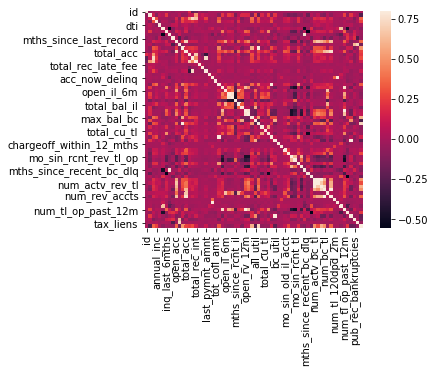

In [118]:
import seaborn as sns
corrmat = y2015_new.corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [119]:
rfc = ensemble.RandomForestClassifier()
X = y2015_new.drop('loan_status', 1)
Y = y2015_new['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.97839044, 0.97240626, 0.97991024, 0.98002897, 0.96461648,
       0.97599145, 0.96520934, 0.97886438, 0.97879212, 0.97900537])